In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [2]:
N = 100
X = np.random.random(N) * 6 - 3
y = 0.5 * X - 1 + np.random.randn(N) * 0.5

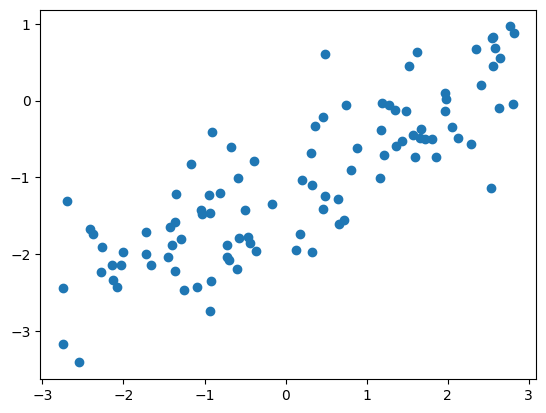

In [3]:
plt.scatter(X, y);

In [4]:
# build model
i = Input(shape=(1,))
x = Dense(1)(i)

model = Model(i, x)

In [5]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
model.compile(
  loss='mse',
  # optimizer='adam',
  optimizer=Adam(learning_rate=0.1),
  metrics=['mae']
)

In [7]:
r = model.fit(
  X.reshape(-1, 1), y,
  epochs=200,
  batch_size=32,
)

Epoch 1/200
4/4 [==============================] - 3s 15ms/step - loss: 1.3519 - mae: 1.0076
Epoch 2/200
4/4 [==============================] - 0s 9ms/step - loss: 0.7607 - mae: 0.7367
Epoch 3/200
4/4 [==============================] - 0s 16ms/step - loss: 0.3748 - mae: 0.4923
Epoch 4/200
4/4 [==============================] - 0s 11ms/step - loss: 0.3612 - mae: 0.4796
Epoch 5/200
4/4 [==============================] - 0s 10ms/step - loss: 0.3529 - mae: 0.4758
Epoch 6/200
4/4 [==============================] - 0s 11ms/step - loss: 0.3549 - mae: 0.4821
Epoch 7/200
4/4 [==============================] - 0s 14ms/step - loss: 0.3489 - mae: 0.4779
Epoch 8/200
4/4 [==============================] - 0s 12ms/step - loss: 0.3195 - mae: 0.4609
Epoch 9/200
4/4 [==============================] - 0s 6ms/step - loss: 0.3062 - mae: 0.4455
Epoch 10/200
4/4 [==============================] - 0s 7ms/step - loss: 0.3064 - mae: 0.4504
Epoch 11/200
4/4 [==============================] - 0s 7ms/step - loss: 

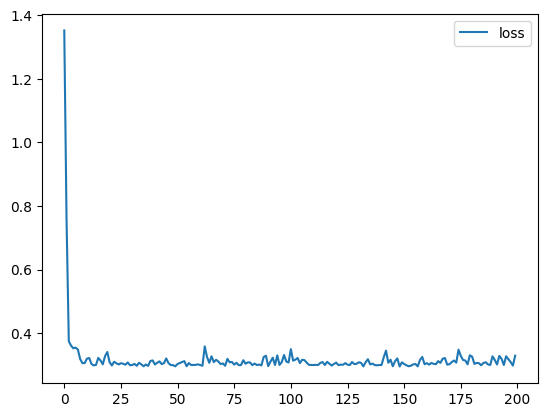

In [8]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.legend();

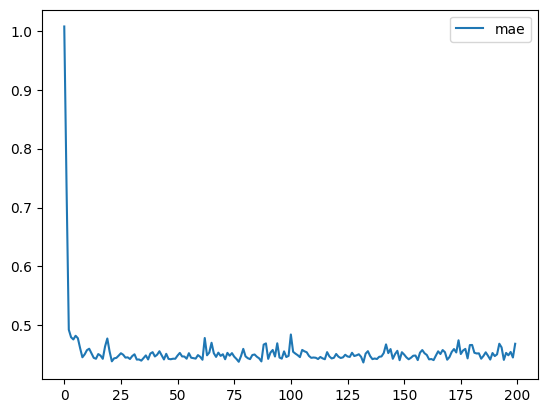

In [9]:
# Plot mae per iteration
plt.plot(r.history['mae'], label='mae')
plt.legend();

In [10]:
# Make predictions
Xtest = np.linspace(-3, 3, 20).reshape(-1, 1)
ptest = model.predict(Xtest)

1/1 [==============================] - 0s 217ms/step


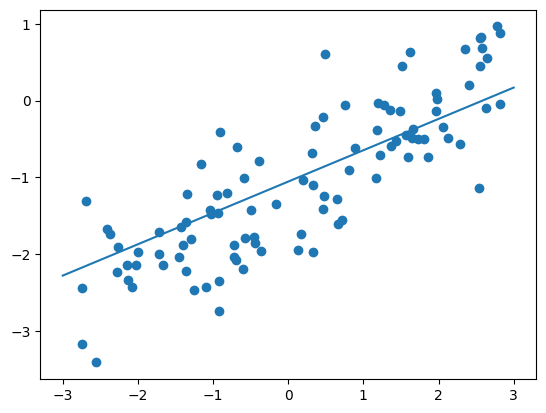

In [11]:
plt.scatter(X, y)
plt.plot(Xtest, ptest);

In [12]:
# Check the learned parameters
model.layers

In [13]:
model.layers[1].get_weights()

[array([[0.40785468]], dtype=float32), array([-1.0534757], dtype=float32)]